# Participantes

Rafael Alves Cardoso -
RM 360124

Silvio Cezer Saczuck -
RM 360204

Luciano Giles Soares -
RM 359834

William Judice Yizima -
RM 360214

Luiz Ricardo Zinsly Calmon -
RM359894

# Escopo

Você é um(a) profissional encarregado(a) de desenvolver um modelo
preditivo de regressão para prever o valor dos custos médicos individuais
cobrados pelo seguro de saúde.

## Dataset
https://osf.io/7u5gy

## Variáveis

Variáveis do dataset:
- idade - idade os exemplo em anos
- sexo  - masculino ou feminino 
- imc	- índice de massa corpórea obtido através de um calculo relacionado altura e peso
- filhos - quantidade de filhos
- fumante - fumante ou não
- regiao - localidade onde mora
- amigos - quantos amigos
- inimigos - quantos inimigos
- chips - com qual frequência tem costume de comer batata chips(escala 0 a 10)
- fritas - com qual frequência tem costume de comer batata frita(escala 0 a 10)
- miojo - com qual frequência tem costume de comer miojo(escala 0 a 10)
- comportamento - comportamento saudável(escala 0 a 10)

# Código

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set()

insurance_dataset = pd.read_csv('./data/insurance_original.csv', decimal=',', sep=';')

print(f'esse dataset tem {insurance_dataset.shape[0]} linhas e {insurance_dataset.shape[1]} colunas')

esse dataset tem 1338 linhas e 13 colunas


# Exploração de Dados

- Carramento da base de dados
- Exploração das características;
- Analise estatísticas descritivas e visualize distribuições relevantes.

### Amostra inicial dos dados

In [4]:
insurance_dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
0,19,feminino,NaN,0,sim,sudoeste,16884.92400,5,3,7,5,3,6
1,18,masculino,33.770,1,nao,sudeste,1725.55230,0,1,4,4,4,3
2,28,masculino,33.000,3,nao,sudeste,4449.46200,9,3,5,2,1,3
3,33,masculino,22.705,0,nao,noroeste,21984.47061,5,10,4,3,2,4
4,32,masculino,28.880,0,nao,noroeste,3866.85520,4,3,4,4,1,7


### Informação sobre o dataset

In [5]:
print(f'esse dataset tem {insurance_dataset.shape[0]} linhas e {insurance_dataset.shape[1]} colunas')

esse dataset tem 1338 linhas e 13 colunas


Na imagem abaixo é possível visualizar as colunas e quais são os tipos de dados armazenados.

Um comentário interessante é que temos algumas variáveis categóricas que possivelmente deverão ser transformada para que as 'features'(x) sejam aceitas pelos modelos escolhidos.

Por exemplo, região(localidade) e fumante(possivelmente será transformado em 0 e 1).

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          1338 non-null   int64  
 1   sexo           1338 non-null   object 
 2   imc            1327 non-null   float64
 3   filhos         1338 non-null   int64  
 4   fumante        1338 non-null   object 
 5   regiao         1338 non-null   object 
 6   encargos       1338 non-null   float64
 7   amigos         1338 non-null   int64  
 8   inimigos       1338 non-null   int64  
 9   chips          1338 non-null   int64  
 10  fritas         1338 non-null   int64  
 11  miojo          1338 non-null   int64  
 12  comportamento  1338 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 136.0+ KB


Abaixo é possível visualizar as análises descritivas estatísticas do conjunto.

Essa visão overview é interessante, pois é possível visualizar alguns pontos de atenção, como:
- idade menor que negativo (uma idade menor que 0 é um absurdo para nosso contexto)
- idade maior que 110 anos(pode ser considerado um erro de preenchimento ou um absurdo para nosso contexto)
- IMC é 0 (um cálculo de altura e peso que traz o valor 0,  não existe)

In [7]:
insurance_dataset.describe()

,idade,imc,filhos,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
count,1338.000000,1327.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,40.670404,30.667841,1.094918,13270.422265,4.933483,4.905830,3.955157,4.068012,4.026906,3.973842
std,34.784427,6.103216,1.205493,12110.011237,3.198855,3.137599,1.985231,1.972665,1.960536,1.991020
min,-3.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,26.250000,26.302500,0.000000,4740.287150,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,39.000000,30.400000,1.000000,9382.033000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000
75%,51.000000,34.687500,2.000000,16639.912515,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000
max,999.000000,53.130000,5.000000,63770.428010,10.000000,10.000000,7.000000,7.000000,7.000000,7.000000


## Visualização de dados
Abaixo a visualização gráfica de dados inicial conjunto (posteriormente iremos tratar os dados e ajustando alguns pontos)

### Encargos x Idade

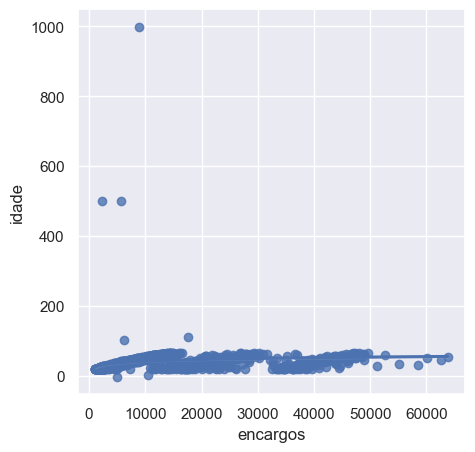

In [11]:
plt.figure(figsize=(5,5))
sns.regplot(data=insurance_dataset, x="encargos", y="idade", logx=True)
plt.show() 

### Idade

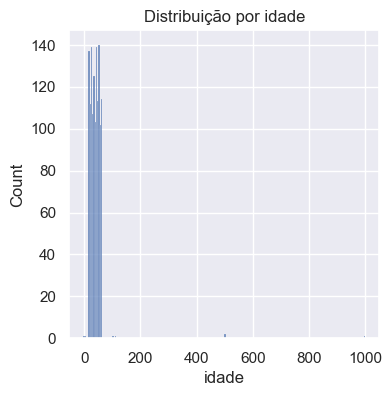

In [16]:
plt.figure(figsize=(4,4))
sns.histplot(insurance_dataset['idade'])
plt.title('Distribuição por idade')
plt.show()

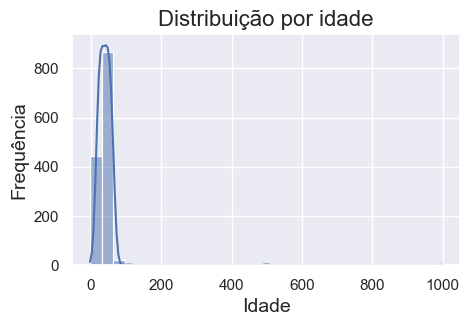

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(insurance_dataset['idade'], bins=30, kde=True)
plt.title('Distribuição por idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)
plt.show()

<br>

### sexo

In [17]:
insurance_dataset['sexo'].value_counts()

masculino    676
feminino     662
Name: sexo, dtype: int64

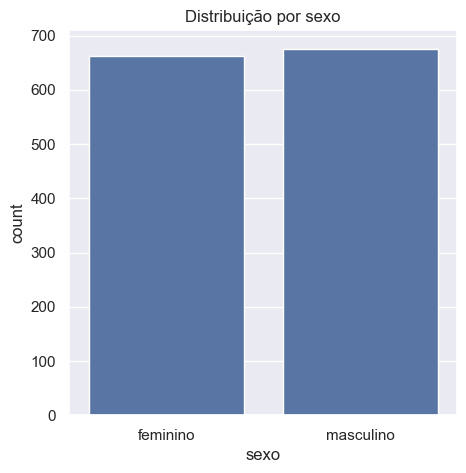

In [15]:

plt.figure(figsize=(5,5))
sns.countplot(x='sexo', data=insurance_dataset)
plt.title('Distribuição por sexo')
plt.show()

### IMC

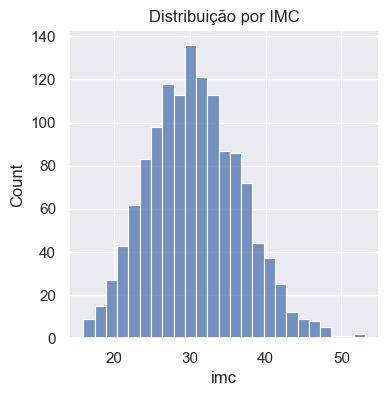

In [18]:
plt.figure(figsize=(4,4))
sns.histplot(insurance_dataset['imc'])
plt.title('Distribuição por IMC')
plt.show()

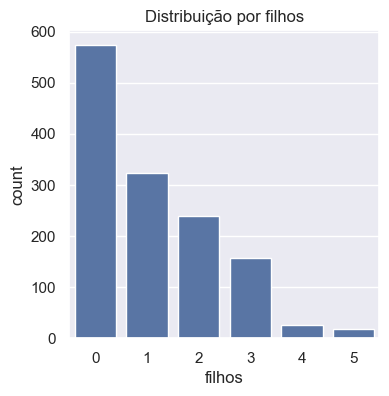

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x='filhos', data=insurance_dataset)
plt.title('Distribuição por filhos')
plt.show()

### Filhos

In [20]:
insurance_dataset['filhos'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: filhos, dtype: int64

### Fumantes

In [21]:
insurance_dataset['fumante'].value_counts()

nao    1064
sim     274
Name: fumante, dtype: int64

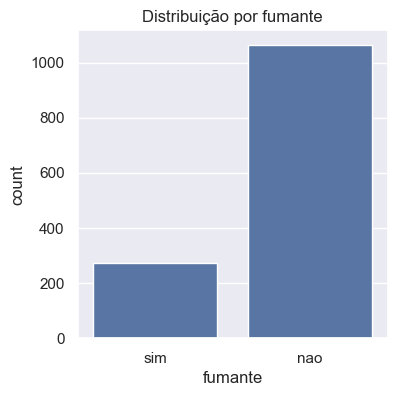

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(x='fumante', data=insurance_dataset)
plt.title('Distribuição por fumante')
plt.show()

### Região

In [24]:
insurance_dataset['regiao'].value_counts()

sudeste     360
sudoeste    324
noroeste    324
nordeste    320
centro       10
Name: regiao, dtype: int64

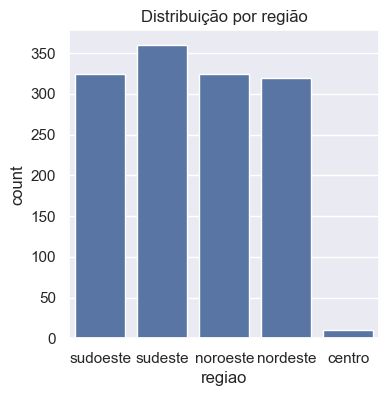

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='regiao', data=insurance_dataset)
plt.title('Distribuição por região')
plt.show()

## Encargos

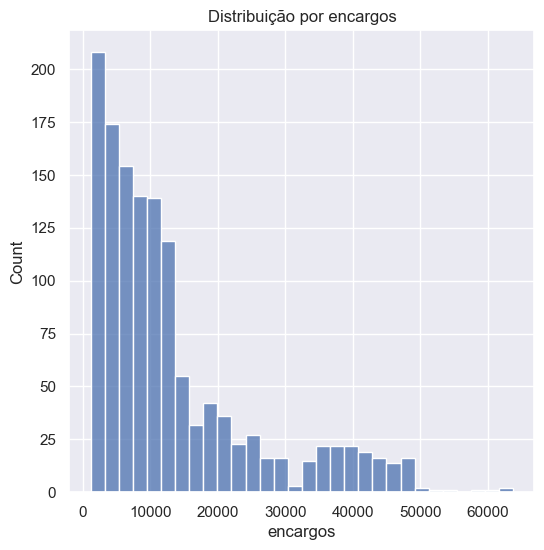

In [25]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['encargos'])
plt.title('Distribuição por encargos')
plt.show()

# Pré-Processamento de dados
- Realização de limpeza
- Visualização da correlação
- Transformação de variáveis categóricas em formatos para a modelagem

### Correlação
mapa de correlação inicial(sem tratamento de dados)
Nossa variável target(y) são os Encargos, portanto queremos quais variáveis do nosso dataset(x) trazem maior mudança para os Encargos.
Visualizando o gráfico de correlação abaixo, podemos dizer que:
 - fumante-> 0.79
 - imc ->0.2
Essas variáveis são as que mais alteram com uma relação positiva os Encargos (quanto mais fumante e maior o IMC, maior o encargo)

In [68]:
ins_sem_literal = insurance_dataset.copy()
# Encode SEXO, FUMANTE e REGIÃO
# O modelo só recebe números, por isso o Label Encoder faz uma representação de numeros para stirngs/obj
# Importante se atentar que as variáveis são restritas (categorias) , pois o Label Encoder faz uma numeração 'Burra'
# le = LabelEncoder()
# for col in ins_sem_literal.columns:
#     if ins_sem_literal[col].dtype == 'object':
#         ins_sem_literal[col] = le.fit_transform(ins_sem_literal[col])
#         for classe, valor in zip(le.classes_, range(len(le.classes_))):
#                 print(f'  {classe} → {valor}')

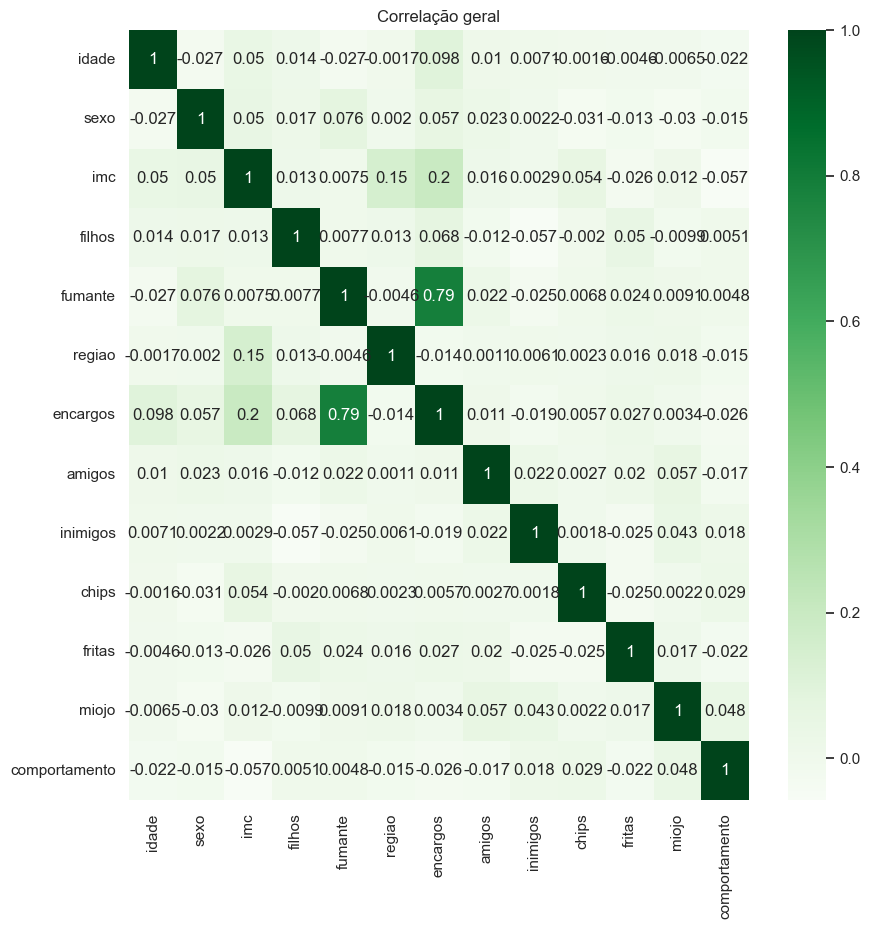

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(ins_sem_literal.corr(), annot=True, cmap='Greens')
plt.title('Correlação geral')
plt.show()

## Limpeza e tratamento de dados

Como visto anteriormente, existem dados nulos em IMC que não fazem sentido para nós.
Existem dados em idades que também não fazem sentido
Existem algumas variáveis categóricas que não serão possíveis inserir no modelo (ele não aceita 'strings' para fazer o cálculo). 
Portanto será necessário: 
- retirar valores nulos 
- retirar 'outliers'
- transformar algumas variáveis categóricas importantes (como região, conforme visto acima) para que seja possível inserir no modelo

Para facilitar a visualização, será mostrado os dados antes e depois dessa transformação.

A idéia dessa é etapa é que o modelo consiga explicar nossa base de dados de forma mais genérica, e não se baseando em outliers

In [40]:
insurance_fase1 = ins_sem_literal.copy()
# Removendo as linhas com as idades especificadas
idades_del = [-3, 2, 103, 111, 499, 500, 999]
# A propriedade IS IN pega todos os registros de idade iguais a lista
# O ~ é negação. Inverte todos os booleanos do anterior, ficando TRUE os que não são as idades.
# Finalmente leva para o dataset somente os index true.
insurance_fase1 = insurance_fase1[~insurance_fase1['idade'].isin(idades_del)]

In [41]:
# Remove todas as linhas que contenham algum campo nulo. No caso, só na coluna IMC tem nulos.
insurance_fase1.dropna(axis=0, how='any', inplace= True)

### Encargos x Idade
É possível ver a diferença do 'esticamento' de dados e sua distribuição.

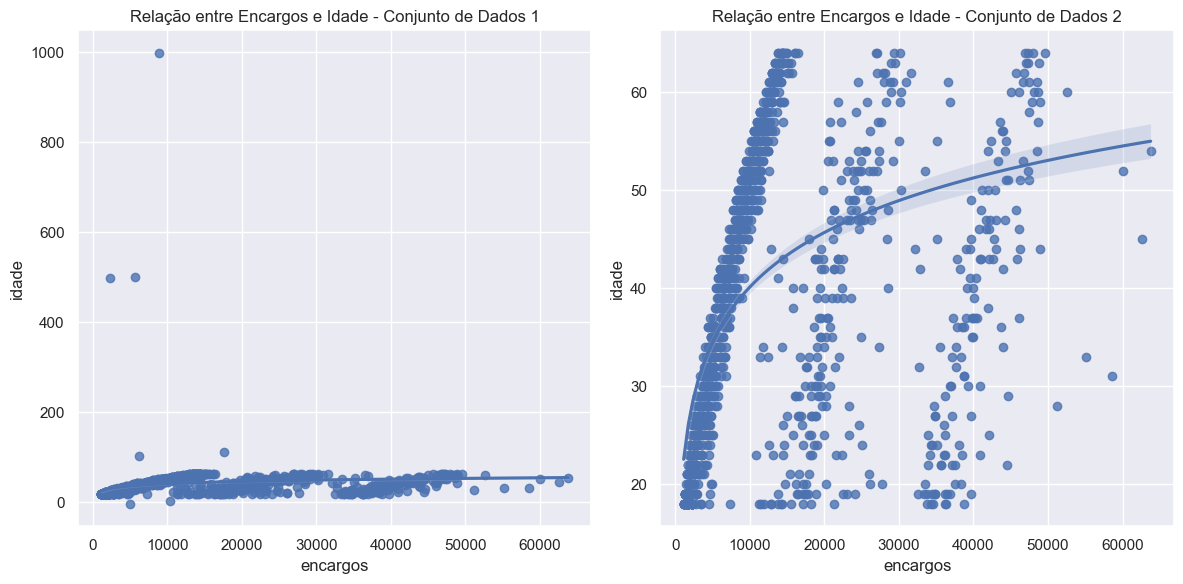

In [43]:
# Criando a figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando o primeiro gráfico
sns.regplot(data=insurance_dataset, x="encargos", y="idade", logx=True, ax=ax1)
ax1.set_title("Relação entre Encargos e Idade - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.regplot(data=insurance_fase1, x="encargos", y="idade", logx=True, ax=ax2)
ax2.set_title("Relação entre Encargos e Idade - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

### Idade

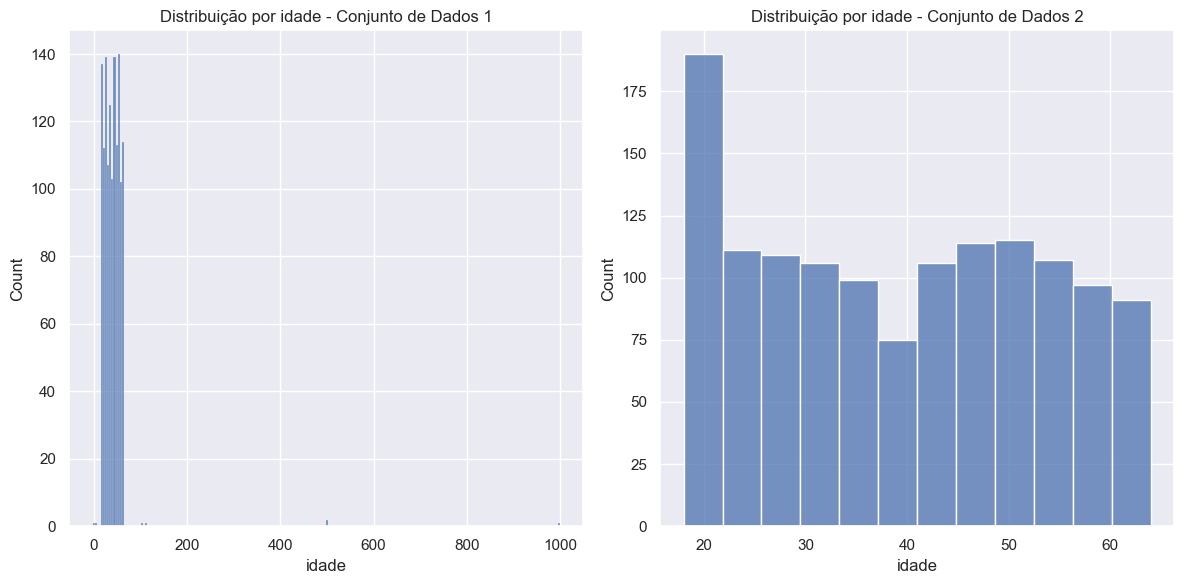

In [45]:
# distribuição da idade
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando o primeiro gráfico
sns.histplot(insurance_dataset['idade'], ax=ax1)
ax1.set_title("Distribuição por idade - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.histplot(insurance_fase1['idade'], ax=ax2)
ax2.set_title("Distribuição por idade - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

### IMC

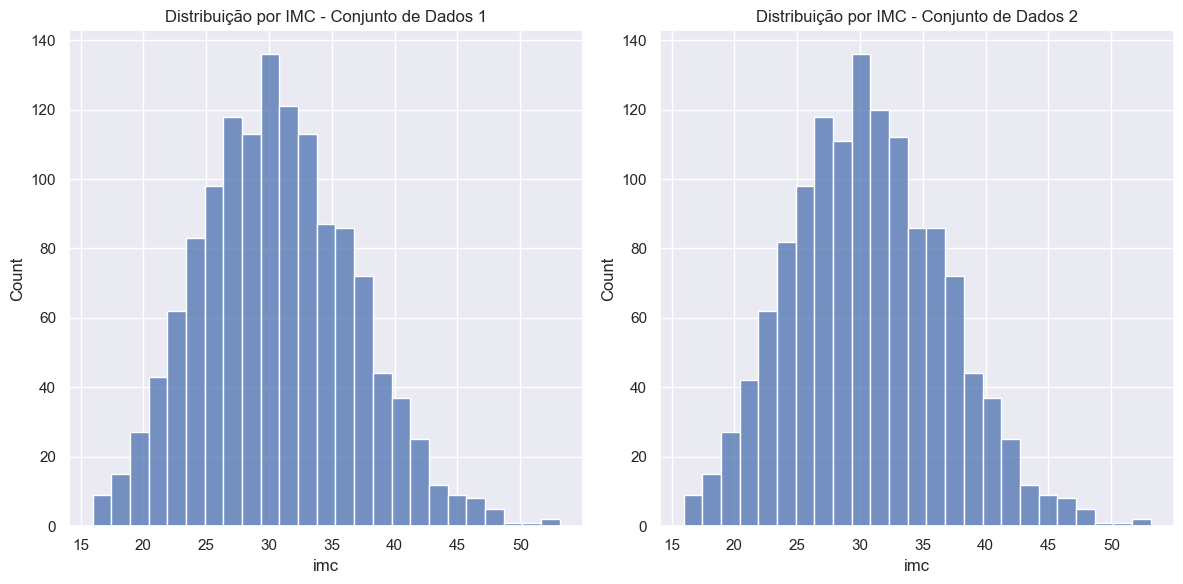

In [46]:
# distribuição por imc
#Normal IMC na faixa de → 18.5 até 24.9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando o primeiro gráfico
sns.histplot(insurance_dataset['imc'], ax=ax1)
ax1.set_title("Distribuição por IMC - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.histplot(insurance_fase1['imc'], ax=ax2)
ax2.set_title("Distribuição por IMC - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

In [47]:
ins_sem_literal = insurance_dataset.copy()
# Encode SEXO, FUMANTE e REGIÃO
# O modelo só recebe números, por isso o Label Encoder faz uma representação de numeros para stirngs/obj
# Importante se atentar que as variáveis são restritas (categorias) , pois o Label Encoder faz uma numeração 'Burra'
le = LabelEncoder()
print(f'Utilizando LabelEncoder para transformar as variáveis categóricas em "números aceito pelo modelo", legenda: ')
print('')
for col in ins_sem_literal.columns:
    if ins_sem_literal[col].dtype == 'object':
        ins_sem_literal[col] = le.fit_transform(ins_sem_literal[col])
        for classe, valor in zip(le.classes_, range(len(le.classes_))):
                print(f'  {classe} → {valor}')

Utilizando LabelEncoder para transformar as variáveis categóricas em "números aceito pelo modelo", legenda: 

  feminino → 0
  masculino → 1
  nao → 0
  sim → 1
  centro → 0
  nordeste → 1
  noroeste → 2
  sudeste → 3
  sudoeste → 4


### Mapa de Correlação

Com a limpeza e tratamento de dados já feito, podemos validar novamente o mapa de correlação.

Veja que foi alterado uma feature (idade), que é de extrema importância. Assim como Região e Fumante, a idade impacta de forma positiva com um peso alto (0.3) em relação aos encargos

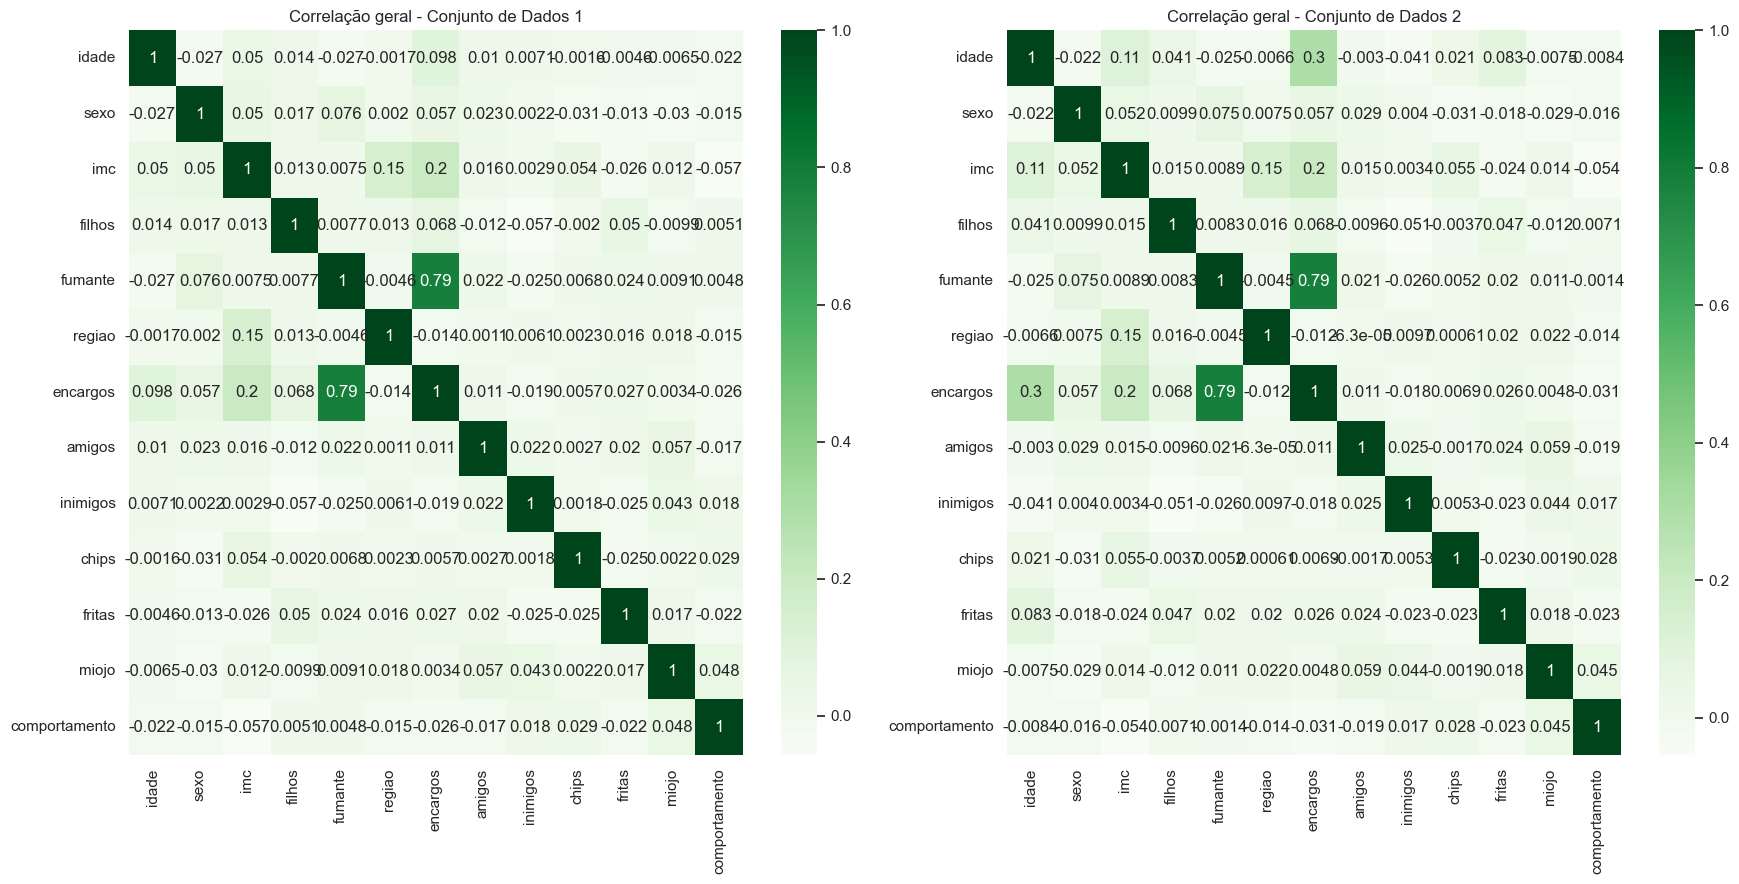

In [48]:
# Mapa para correlação entre colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plotando o primeiro gráfico
sns.heatmap(ins_sem_literal.corr(), annot=True, cmap='Greens', ax=ax1)
ax1.set_title("Correlação geral - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.heatmap(insurance_fase1.corr(), annot=True, cmap='Greens', ax=ax2)
ax2.set_title("Correlação geral - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

# Modelagem
- Crie um modelo preditivo de regressão utilizando uma técnica à sua
escolha (por exemplo: Regressão Linear, Árvores de Decisão etc);
- Divida o conjunto de dados em conjuntos de treinamento e teste.

y -> target, o que queremos buscar = Encargos

x -> features, outras variáveis

## Modelo Regressão Linear

In [51]:
# features
X = insurance_fase1.drop(columns='encargos', axis=1)


# target
Y = insurance_fase1['encargos']

In [58]:
#separa para treino 80% e teste 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
# Efetivando os treinos
training_data_previsao = regressor.predict(X_train)
# metrics.r2_score -> mede a qualidade da regressão
r2_train = metrics.r2_score(Y_train, training_data_previsao)
# efetivando os testes
test_data_previsao =regressor.predict(X_test)
# Idem
r2_test = metrics.r2_score(Y_test, test_data_previsao)

Trecho de código que separa treino e teste
```
#separa para treino 80% e teste 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
```

In [59]:
print('R**2 treino : ', r2_train)
print('R^2 teste : ', r2_test)
resume_regression = f"Dados de teste tiveram uma acerto de {round(r2_test,2)*100}% e os dados de treino tiveram {round(r2_train,2)*100}%"

R**2 treino :  0.7635651088920332
R^2 teste :  0.7067024745910114


In [60]:
print('Resultados iniciais:')
resume_regression

Resultados iniciais:


'Dados de teste tiveram uma acerto de 71.0% e os dados de treino tiveram 76.0%'

### MAE, MSE, RMSE

---
MAE (Erro Médio Absoluto - Mean Absolute Error)

O Erro Médio Absoluto (MAE) mede a média dos valores absolutos das diferenças entre os valores reais (Y) e os valores previstos (y_pred).
Um MAE mais baixo indica que o modelo está fazendo previsões mais próximas dos valores reais.

---
MSE (Erro Quadrático Médio - Mean Squared Error)

O Erro Quadrático Médio (MSE) calcula a média dos quadrados dos erros (diferenças entre valores reais e previstos).
Penaliza erros maiores de forma mais significativa por elevar as diferenças ao quadrado.

---
RMSE (Raiz do Erro Quadrático Médio - Root Mean Squared Error)

O RMSE é simplesmente a raiz quadrada do MSE. Ele traz o erro para a mesma escala dos valores de Y.
Assim como o MSE, mas em uma escala mais fácil de interpretar.

Essas métricas são usadas para avaliar a performance de modelos de regressão. Quanto menores esses valores, melhor o modelo está prevendo os resultados.

In [64]:
# Calculando as métricas
mae = mean_absolute_error(Y_train, training_data_previsao)
mse = mean_squared_error(Y_train, training_data_previsao)
rmse = np.sqrt(mse)


linear_regression_1 = f"""REGRESSAO LINEAR-> MAE: {mae:.2f}"""
linear_regression_2 = f"""REGRESSAO LINEAR-> MSE: {mse:.2f}"""
linear_regression_3 = f"""REGRESSAO LINEAR-> RMSE: {rmse:.2f} """

In [65]:
linear_regression_1

'REGRESSAO LINEAR-> MAE: 4023.41'

In [66]:
linear_regression_2

'REGRESSAO LINEAR-> MSE: 34487296.24'

In [67]:
linear_regression_3

'REGRESSAO LINEAR-> RMSE: 5872.59 '

# Observações e validação estatística